# Web Scraping with Beautiful Soup - Lab

## Introduction

Now that you've read and seen some docmentation regarding the use of Beautiful Soup, its time to practice and put that to work! In this lab you'll formalize some of our example code into functions and scrape the lyrics from an artist of your choice.

## Objectives
You will be able to:
* Scrape Static webpages
* Select specific elements from the DOM

## Link Scraping

Write a function to collect the links to each of the song pages from a given artist page.

In [1]:
#Starter Code

from bs4 import BeautifulSoup
import requests


url = 'https://www.azlyrics.com/m/metallica.html' #Put the URL of your AZLyrics Artist Page here!

def get_song_pages(url):
    
    html_page = requests.get(url) #Make a get request to retrieve the page
    soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing

    albums = soup.find_all('div', class_='album')

    pages = [] #Create a storage container
    for album_n in range(len(albums)):
        #On the last album, we won't be able to look forward
        if album_n == len(albums)-1:
            cur_album = albums[album_n]
            album_songs = cur_album.findNextSiblings('a')
            for song in album_songs:
                page = str(song.get('href'))[2:]
                page = f'https://www.azlyrics.com{page}'
                title = song.text
                album = cur_album.text
                pages.append((title, page, album))
        else:
            cur_album = albums[album_n]
            next_album = albums[album_n+1]
            saca = cur_album.findNextSiblings('a') #songs after current album
            sbna = next_album.findPreviousSiblings('a') #songs before next album
            album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
            for song in album_songs:
                page = str(song.get('href'))[2:]
                page = f'https://www.azlyrics.com{page}'
                title = song.text
                album = cur_album.text
                pages.append((title, page, album))

    return(pages)

## Text Scraping
Write a secondary function that scrapes the lyrics for each song page.

In [2]:
#Remember to open up the webpage in a browser and control-click/right-click and go to inspect!
from bs4 import BeautifulSoup
import requests
import numpy as np

song_url = 'https://www.azlyrics.com/lyrics/foofighters/everlong.html'

def get_lyrics(song_url):
    html_page = requests.get(song_url) #Make a get request to retrieve the page
    soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing

    ring = soup.find('div', class_='ringtone')
    lyrics = ring.findNextSibling('div').text
    return lyrics

# get_lyrics(song_url)

## Synthesizing
Create a script using your two functions above to scrape all of the song lyrics for a given artist.


In [3]:
#Use this block for your code!
def artist_lyrics(url):
    song_pages = get_song_pages(url)
    song_lyrics = []
    for page in song_pages:
        try:
            lyrics = get_lyrics(page[1])
        except:
            lyrics = 'N/A'
        song_lyrics.append(lyrics)
    return song_pages, song_lyrics

In [4]:
url = 'https://www.azlyrics.com/m/metallica.html'
met_pages, met_lyrics = artist_lyrics(url)

In [5]:
for i in range(len(met_lyrics)):
    print(met_pages[i][0])
    print(met_lyrics[i])

Hit The Lights


No life till leather
We are gonna kick some ass tonight
We got the metal madness
When our fans start screaming
It's right well alright
When we start to rock
We never want to stop again

Hit the lights
Hit the lights
Hit the lights

We know our fans are insane
We are gonna blow this place away
With volume higher
Than anything today the only way
When we start to rock
We never want to stop again

Hit the lights
Hit the lights
Hit the lights

With all our screaming
We are gonna rip right through your brain
We got the lethal power
It is causing you sweet pain Oh sweet pain
When we start to rock
We never want to stop again

Hit the lights
Hit the lights
Hit the lights
Hit the lights

The Four Horsemen


By the last breath of the fourth winds blow
Better raise your ears
The sound of hooves knock at your door
Lock up your wife and children now
It's time to wield the blade
For now you have got some company

The Horsemen are drawing nearer
On leather steeds they ride
They've com

## Visualizing
Generate two bar graphs to compare lyrical changes for the artist of your chose. For example, the two bar charts could compare the lyrics for two different songs or two different albums.

In [6]:
#Use this block for your code!
import pandas as pd
metallica_df = pd.DataFrame(met_pages)
metallica_df.columns = ['Song Name', 'URL', 'Album']
metallica_df['Lyrics'] = met_lyrics
metallica_df.head()

,Song Name,URL,Album,Lyrics
0,Hit The Lights,https://www.azlyrics.com/lyrics/metallica/hitt...,"album: ""Kill 'Em All"" (1983)",\n\r\nNo life till leather\nWe are gonna kick ...
1,The Four Horsemen,https://www.azlyrics.com/lyrics/metallica/thef...,"album: ""Kill 'Em All"" (1983)",\n\r\nBy the last breath of the fourth winds b...
2,Motorbreath,https://www.azlyrics.com/lyrics/metallica/moto...,"album: ""Kill 'Em All"" (1983)",\n\r\nLiving and dying laughing and crying\nOn...
3,Jump In The Fire,https://www.azlyrics.com/lyrics/metallica/jump...,"album: ""Kill 'Em All"" (1983)",\n\r\nDown in the depths of my fiery home\nThe...
4,Whiplash,https://www.azlyrics.com/lyrics/metallica/whip...,"album: ""Kill 'Em All"" (1983)","\n\r\nLate at night, all systems go\nYou’ve co..."


In [7]:

metallica_df['Lyrics'] = metallica_df['Lyrics'].str.strip()
metallica_df['Lyrics'] = metallica_df['Lyrics'].str.replace('\n', ' ')
metallica_df.head()

,Song Name,URL,Album,Lyrics
0,Hit The Lights,https://www.azlyrics.com/lyrics/metallica/hitt...,"album: ""Kill 'Em All"" (1983)",No life till leather We are gonna kick some as...
1,The Four Horsemen,https://www.azlyrics.com/lyrics/metallica/thef...,"album: ""Kill 'Em All"" (1983)",By the last breath of the fourth winds blow Be...
2,Motorbreath,https://www.azlyrics.com/lyrics/metallica/moto...,"album: ""Kill 'Em All"" (1983)",Living and dying laughing and crying Once you ...
3,Jump In The Fire,https://www.azlyrics.com/lyrics/metallica/jump...,"album: ""Kill 'Em All"" (1983)",Down in the depths of my fiery home The summon...
4,Whiplash,https://www.azlyrics.com/lyrics/metallica/whip...,"album: ""Kill 'Em All"" (1983)","Late at night, all systems go You’ve come to s..."


In [8]:
condition_1 = (metallica_df['Album'].str.contains('justice', case=False))
condition_2 = (metallica_df['Lyrics'].str != 'N/A')
justice_df = metallica_df.loc[condition_1 & condition_2]
justice_df.head()

,Song Name,URL,Album,Lyrics
47,Blackened,https://www.azlyrics.com/lyrics/metallica/blac...,"album: ""...And Justice For All"" (1988)",Blackened is the end Winter it will send Throw...
48,...And Justice For All,https://www.azlyrics.com/lyrics/metallica/andj...,"album: ""...And Justice For All"" (1988)",Halls of justice painted green Money talking P...
49,Eye Of The Beholder,https://www.azlyrics.com/lyrics/metallica/eyeo...,"album: ""...And Justice For All"" (1988)",Do you see what I see? Truth is an offence You...
50,One,https://www.azlyrics.com/lyrics/metallica/one....,"album: ""...And Justice For All"" (1988)",I can’t remember anything Can’t tell if this i...
51,The Shortest Straw,https://www.azlyrics.com/lyrics/metallica/thes...,"album: ""...And Justice For All"" (1988)",Suspicion is your name Your honesty to blame P...


In [9]:
condition_1 = (metallica_df['Album'].str.contains('puppet', case=False))
condition_2 = (metallica_df['Lyrics'].str != 'N/A')
puppets_df = metallica_df.loc[ condition_1 & condition_2]
puppets_df

,Song Name,URL,Album,Lyrics
24,Battery,https://www.azlyrics.com/lyrics/metallica/batt...,"album: ""Master Of Puppets"" (1986)","Lashing out the action, returning the reaction..."
25,Master Of Puppets,https://www.azlyrics.com/lyrics/metallica/mast...,"album: ""Master Of Puppets"" (1986)","End of passion play, crumbling away I’m your s..."
26,The Thing That Should Not Be,https://www.azlyrics.com/lyrics/metallica/thet...,"album: ""Master Of Puppets"" (1986)",Messenger of fear in sight Dark deception kill...
27,Welcome Home (Sanitarium),https://www.azlyrics.com/lyrics/metallica/welc...,"album: ""Master Of Puppets"" (1986)",Welcome to where time stands still No one leav...
28,Disposable Heroes,https://www.azlyrics.com/lyrics/metallica/disp...,"album: ""Master Of Puppets"" (1986)","Bodies fill the fields I see, hungry heroes en..."
29,Leper Messiah,https://www.azlyrics.com/lyrics/metallica/lepe...,"album: ""Master Of Puppets"" (1986)","Spineless from the start, sucked into the part..."
30,"Damage, Inc.",https://www.azlyrics.com/lyrics/metallica/dama...,"album: ""Master Of Puppets"" (1986)",Dealing out the agony within Charging hard and...
31,,https://www.azlyrics.comne,"album: ""Master Of Puppets"" (1986)",N/A
32,Am I Evil?,https://www.azlyrics.com/lyrics/metallica/amie...,"album: ""Master Of Puppets"" (1986)","My mother was a witch, she was burned alive. T..."
33,Blitzkrieg,https://www.azlyrics.com/lyrics/metallica/blit...,"album: ""Master Of Puppets"" (1986)","Let us have peace, let us have life, Let us es..."


In [10]:
import re
import tweepy

In [11]:
puppets_lyrics = ''
justice_lyrics=''
for i in range(len(puppets_df)):
    new_lyrics = puppets_df.iloc[i]['Lyrics']
    puppets_lyrics = f'{puppets_lyrics} {new_lyrics}'
    
for i in range(len(justice_df)):
    new_lyrics = justice_df.iloc[i]['Lyrics']
    justice_lyrics = f'{justice_lyrics} {new_lyrics}'
    
puppets_lyrics, justice_lyrics

(" Lashing out the action, returning the reaction Weak are ripped and torn away Hypnotizing power, crushing all that cower Battery is here to stay  Smashing through the boundaries Lunacy has found me Cannot stop the battery Pounding out aggression Turns into obsession Cannot kill the battery  Cannot kill the family Battery is found in me  Battery Battery  Crushing all deceivers, mashing non-believers Never-ending potency Hungry violence-seeker, feeding off the weaker Breeding on insanity  Smashing through the boundaries Lunacy has found me Cannot stop the battery Pounding out aggression Turns into obsession Cannot kill the battery  Cannot kill the family Battery is found in me  Battery Battery  Circle of destruction, hammer comes crushing Powerhouse of energy Whipping up a fury, dominating flurry We create the battery  Smashing through the boundaries Lunacy has found me Cannot stop the battery Pounding out aggression Turns into obsession Cannot kill the battery  Cannot kill the family 

In [12]:
# A SIMPLE TOKENZIER IMPLEMENTAION 

# Import Regular Expressions
import re

# Identify some basic emoticon elements (face, nose, mouth )- you are encouraged to add more for other emoticons
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""

# Identify Twitter specific elements in a tweet
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess_lyrics(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [14]:
from nltk import bigrams 

def get_bigrams(text):
    stop_text = [',', '?', '.', '’']
    terms = [term for term in preprocess_lyrics(text, lowercase=True)]
    clean_terms = []
    for i in range(len(terms)):
        if terms[i] in stop_text:
            pass
        elif len(terms[i]) == 1 and terms[i] != 'i' and terms[i] != 'a':
            clean_terms[-1] = clean_terms[-1] + '’' + terms[i]
        else:
            clean_terms.append(terms[i])
    bigram_terms = bigrams(clean_terms)
    return list(bigram_terms)

puppets_bigram = get_bigrams(puppets_lyrics)
justice_bigram = get_bigrams(justice_lyrics)
puppets_bigram, justice_bigram

([('lashing', 'out'),
  ('out', 'the'),
  ('the', 'action'),
  ('action', 'returning'),
  ('returning', 'the'),
  ('the', 'reaction'),
  ('reaction', 'weak'),
  ('weak', 'are'),
  ('are', 'ripped'),
  ('ripped', 'and'),
  ('and', 'torn'),
  ('torn', 'away'),
  ('away', 'hypnotizing'),
  ('hypnotizing', 'power'),
  ('power', 'crushing'),
  ('crushing', 'all'),
  ('all', 'that'),
  ('that', 'cower'),
  ('cower', 'battery'),
  ('battery', 'is'),
  ('is', 'here'),
  ('here', 'to'),
  ('to', 'stay'),
  ('stay', 'smashing'),
  ('smashing', 'through'),
  ('through', 'the'),
  ('the', 'boundaries'),
  ('boundaries', 'lunacy'),
  ('lunacy', 'has'),
  ('has', 'found'),
  ('found', 'me'),
  ('me', 'cannot'),
  ('cannot', 'stop'),
  ('stop', 'the'),
  ('the', 'battery'),
  ('battery', 'pounding'),
  ('pounding', 'out'),
  ('out', 'aggression'),
  ('aggression', 'turns'),
  ('turns', 'into'),
  ('into', 'obsession'),
  ('obsession', 'cannot'),
  ('cannot', 'kill'),
  ('kill', 'the'),
  ('the', 'bat

In [15]:
from collections import Counter

def bigram_count(bigrams, count=10):
    cnt = Counter()
    for bigram in bigrams:
        cnt[bigram] += 1
    return cnt.most_common(n=count)

puppet_counts, justice_counts = bigram_count(puppets_bigram, count=20), bigram_count(justice_bigram, count=20)
puppet_counts

[(('master', 'master'), 15),
 (('you', 'will'), 13),
 (('am', 'i'), 13),
 (('i', 'am'), 13),
 (('i', 'evil'), 12),
 (('to', 'the'), 11),
 (('back', 'to'), 10),
 (('the', 'front'), 10),
 (('i', 'say'), 10),
 (('front', 'you'), 9),
 (('yes', 'i'), 8),
 (('the', 'battery'), 7),
 (('your', 'life'), 7),
 (('you', 'scream'), 7),
 (('lie', 'lie'), 7),
 (('cannot', 'kill'), 6),
 (('kill', 'the'), 6),
 (('faster', 'obey'), 6),
 (('obey', 'your'), 6),
 (('your', 'master'), 6)]

In [31]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [35]:
def plot_terms(my_top_terms, album_name='Album Name'):
    x, y = [], []
    for terms in my_top_terms:
        x.append(terms[0][0] + ' ' + terms[0][1])
        y.append(terms[1])

    plt.figure(figsize=(20, 8))
    plt.bar(x, y)
    plt.xlabel('Bigrams')
    plt.xticks(rotation='vertical')
    plt.ylabel('Frequency Count')
    plt.title(f'Most Common Bigrams in {album_name}')
    plt.show

(None, None)

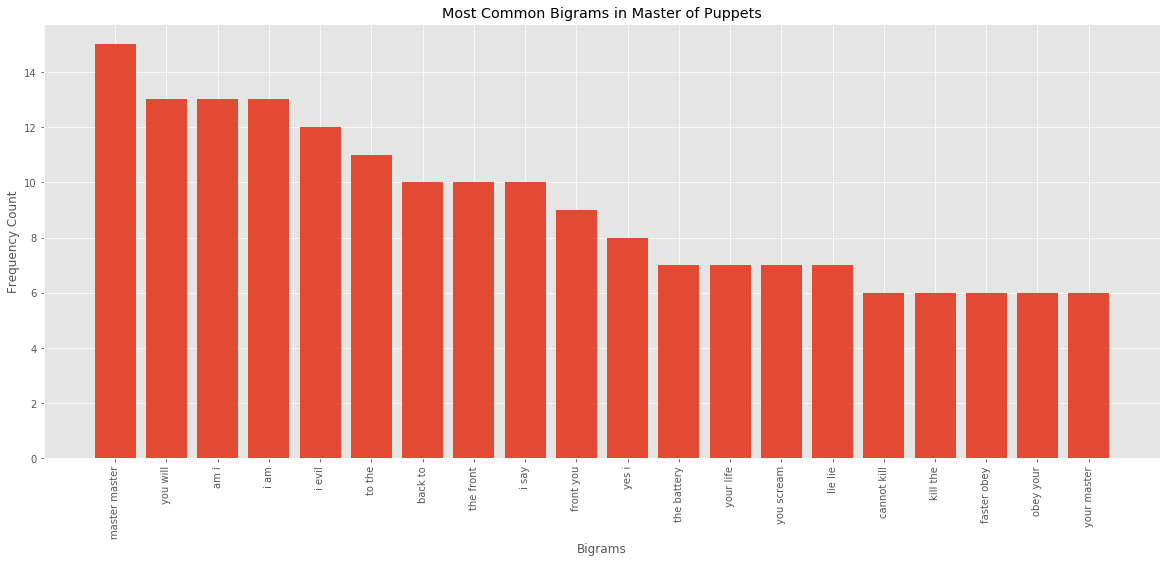

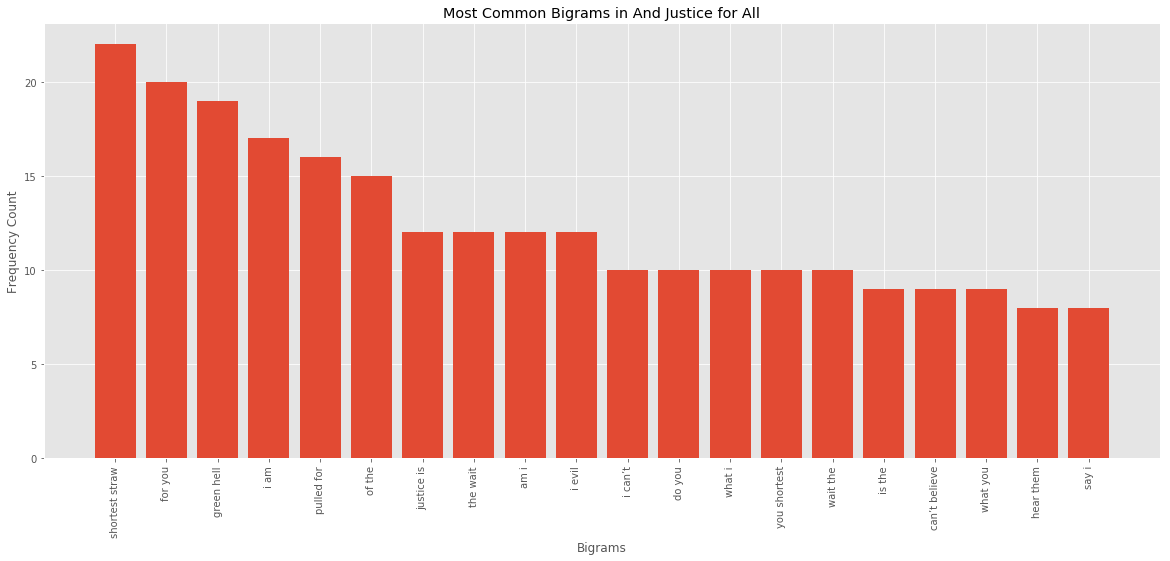

In [36]:
plot_terms(puppet_counts, album_name='Master of Puppets'), plot_terms(justice_counts, album_name='And Justice for All')

## Level - Up

Think about how you structured the data from your web scraper. Did you scrape the entire song lyrics verbatim? Did you simply store the words and their frequency counts, or did you do something else entirely? List out a few different options for how you could have stored this data. What are advantages and disadvantages of each? Be specific and think about what sort of analyses each representation would lend itself to.

In [ ]:
#Use this block for your code!

## Summary

Congratulations! You've now practiced your Beautiful Soup knowledge!